In [3]:

# Imports
import math

import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [4]:
housingdf = pd.read_csv('AmesHousing.csv')
housingdf.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
print('Our training dataset has {} rows and {} columns.'.format(housingdf.shape[0], housingdf.shape[1]))

Our training dataset has 2930 rows and 82 columns.


In [12]:
#numerical & categorical columns 
catcols = housingdf.select_dtypes('object').columns
numcols = housingdf.select_dtypes('number').columns
print("Categorical variable count: ", len(catcols))
print("Numerical variable count: ", len(numcols))


Categorical variable count:  43
Numerical variable count:  39


In [14]:
print("Categorical variables: ", catcols)
print("Numerical variables: ", numcols)


Categorical variables:  Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')
Numerical variables:  Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', 

### EDA 

The cheapest house sold for $12,789 and the most expensive for $755,000
The average sales price is $180,796, while median is $160,000


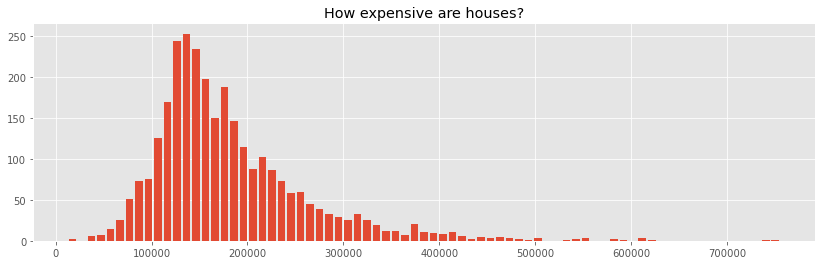

In [11]:
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    housingdf.SalePrice.min(), housingdf.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    housingdf.SalePrice.mean(), housingdf.SalePrice.median()))
housingdf.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

Oldest house built in 1872. Newest house built in 2010.


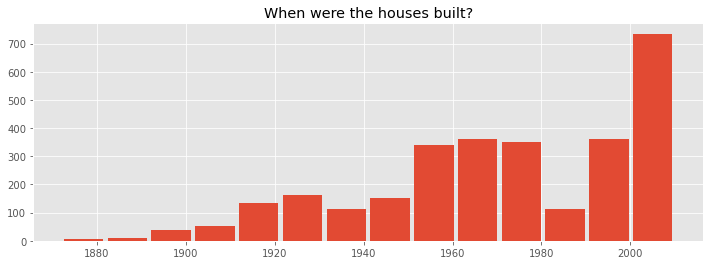

In [16]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(housingdf['Year Built'].min(), housingdf['Year Built'].max()))
housingdf['Year Built'].hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()
# housingdf['Year Built']

/Users/tanimish/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


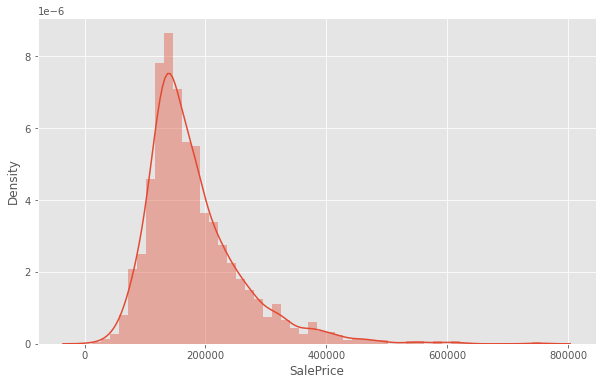

Skewness Score: 1.7435000757376466
Kurtosis Score: 5.118899951130896


In [21]:
# Let's start with our dependent variable, SalePrice
plt.figure(figsize=(10,6))
sns.distplot(housingdf['SalePrice'])
plt.show()

print('Skewness Score:', (housingdfhousingdf['SalePrice'].skew()))
print('Kurtosis Score:', (housingdf['SalePrice'].kurtosis()))


 We can see data is postively skewed therefore there are outliers with this feature majorly towards the right side i.e higher sale prices 

We will deal with these outliers while doing multivariate analysis. We will do univariate analysis on the data first to look over 

#### Univariate Analysis for Categorical Variables

we will draw historgrams to understand the distribution of numerical values

<Figure size 432x288 with 0 Axes>

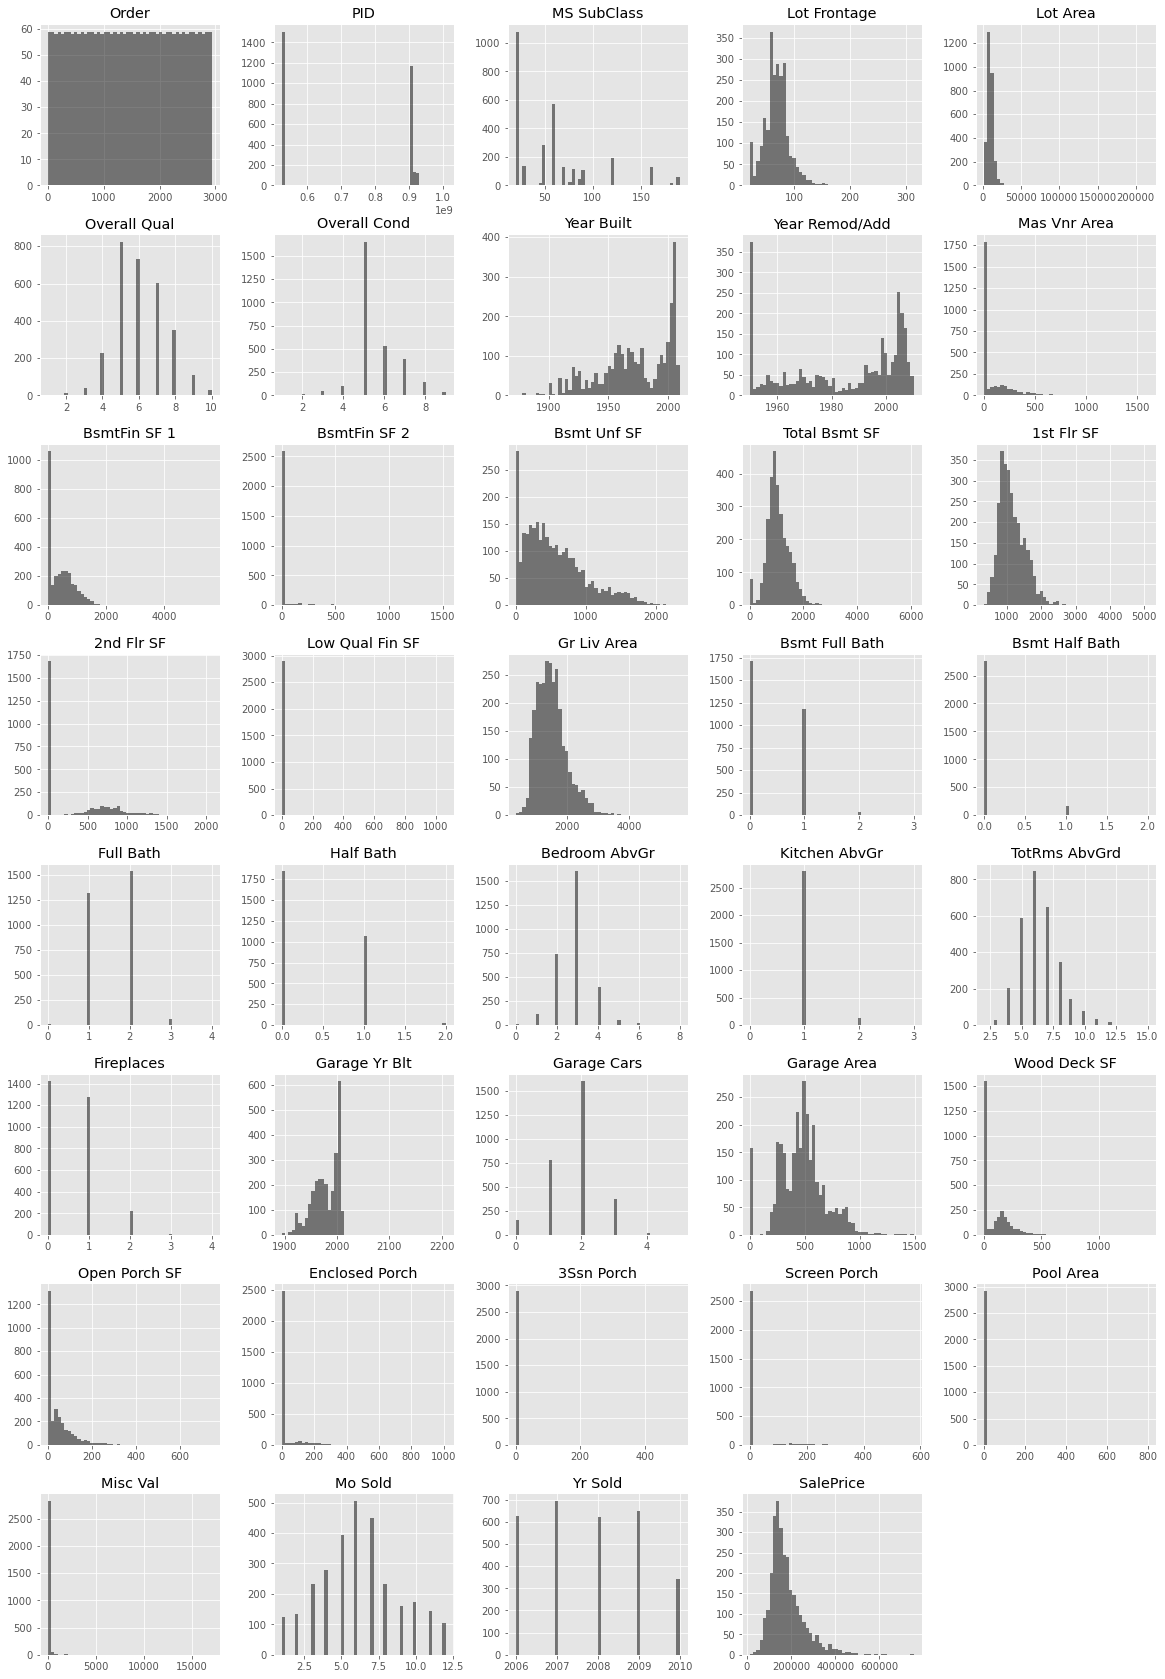

In [28]:
plt.figure()
housingdf.hist(layout=(8,5),color='k', alpha=0.5, bins=50,figsize=(20,30));

We can see some numerical features have no variance so they will not be useful for our analysis - 
MasVNRArea BsmtFinSF2, 2ndFlrSF, LowQualFinSF, BsmtHalfBath, MiscVal, PoolArea, ScreenPorch,3SsnPorch, EnclosedPorch

we will determine the correlation of these features to our target variable. We will plot a heatmap later to determine the correlation

#### Univariate Analysis for Categorical Variables

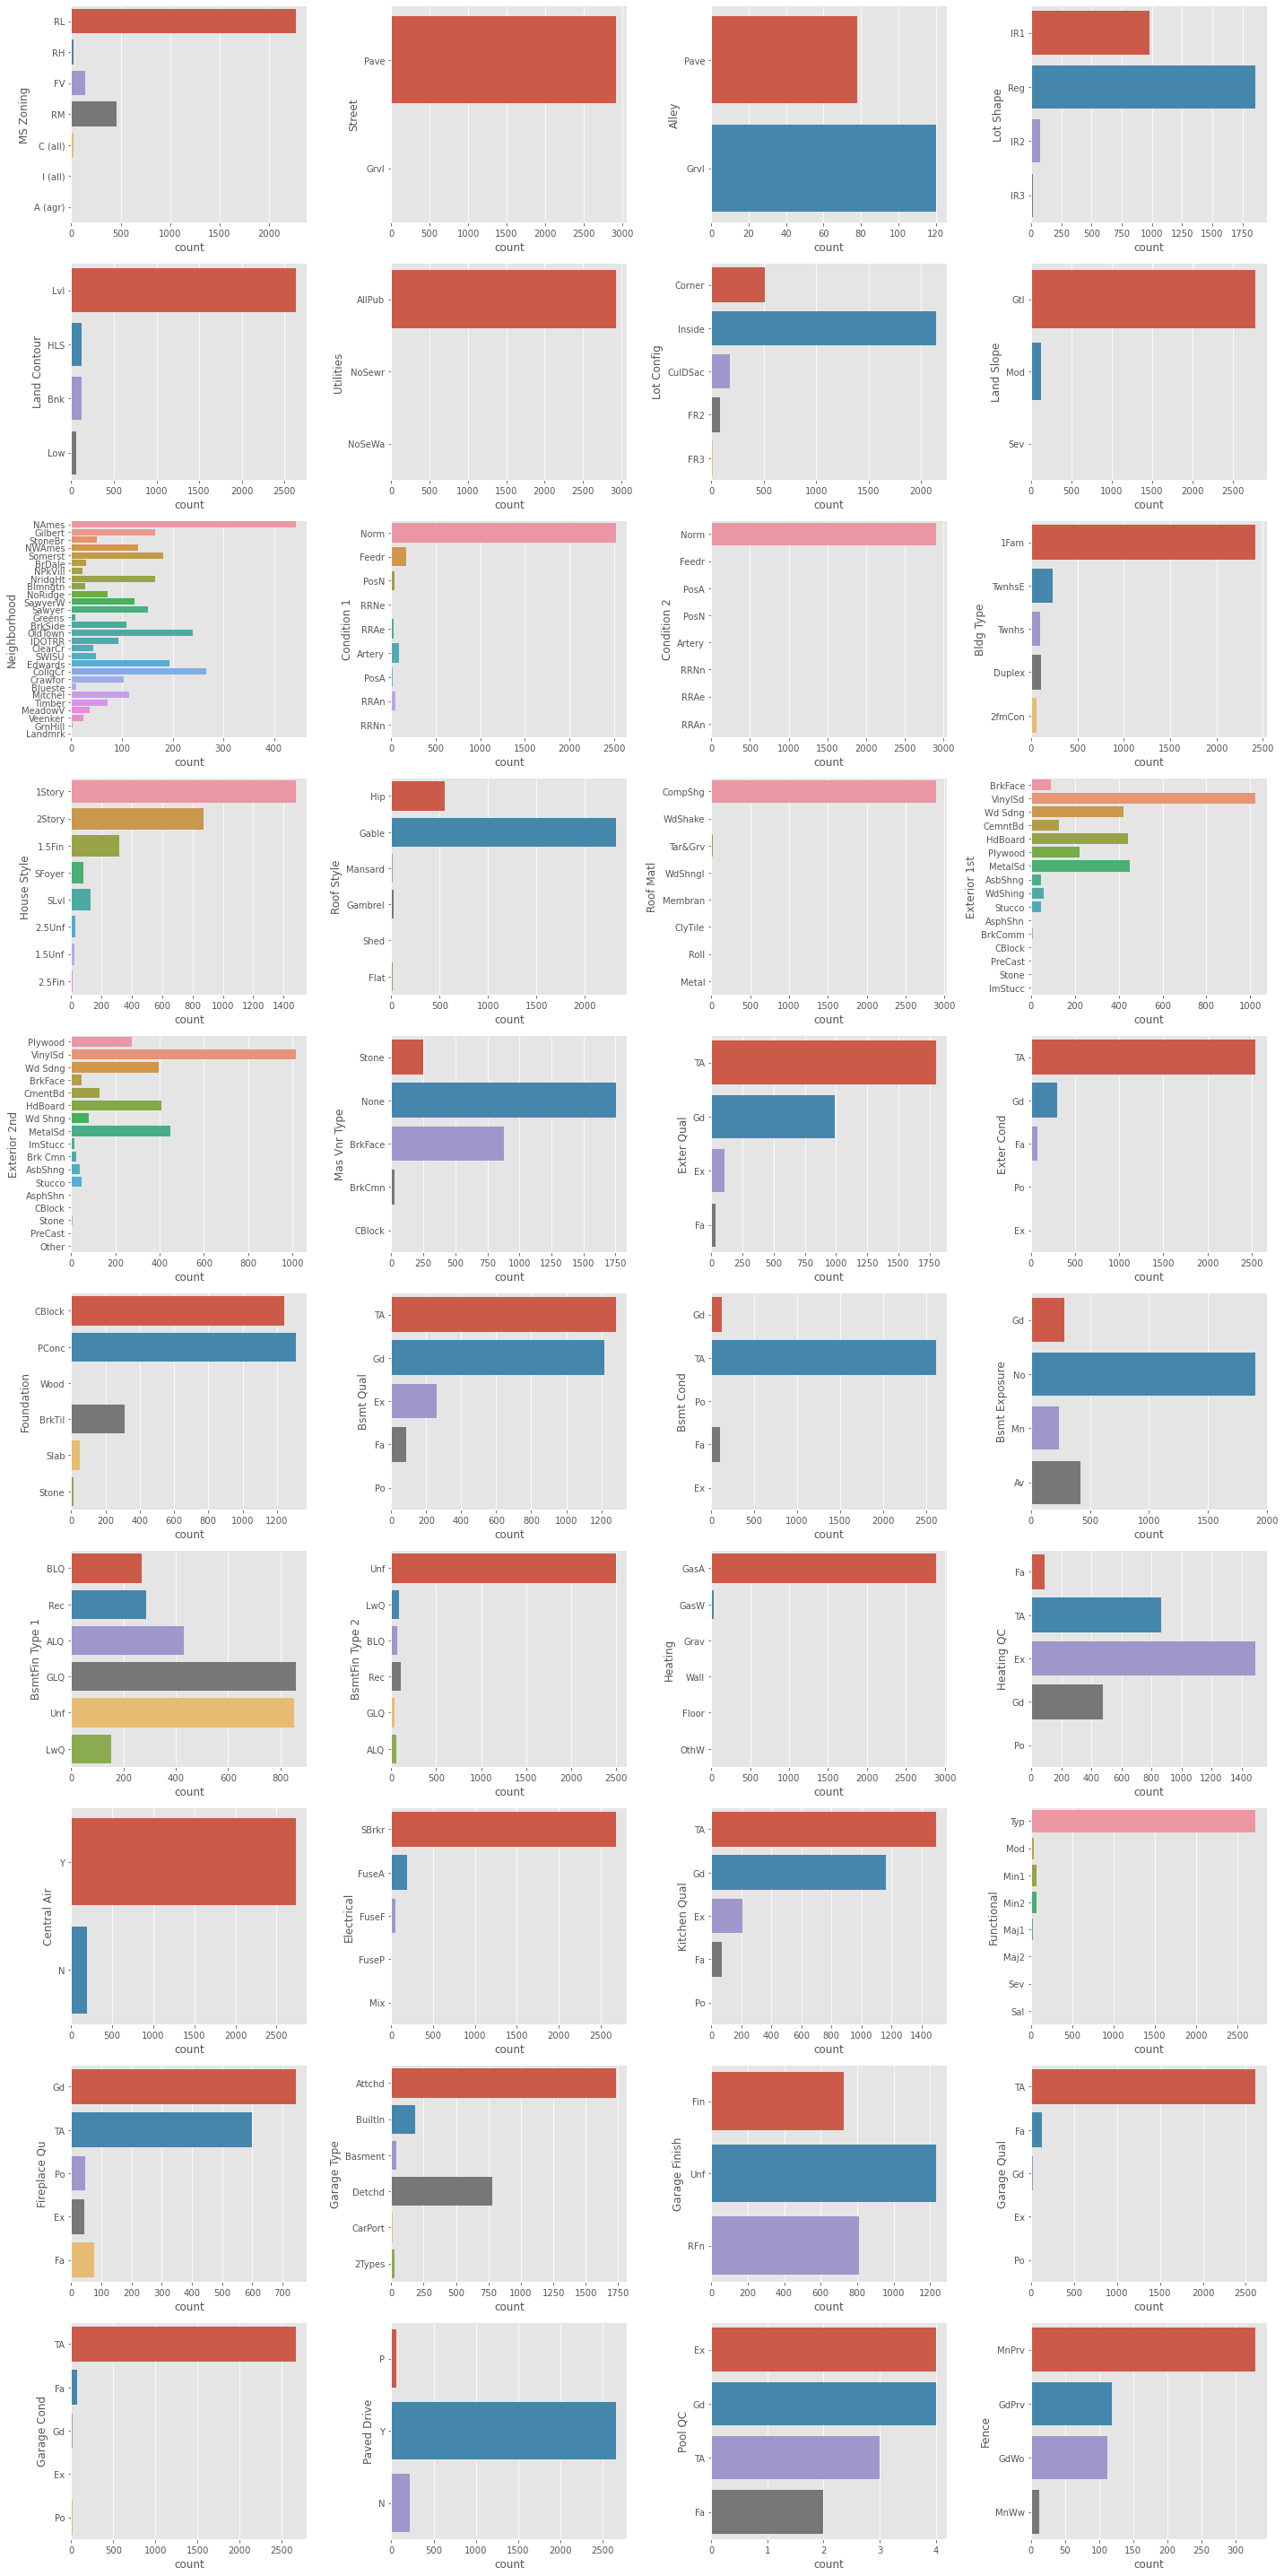

In [26]:
# Plot bar plot for each categorical feature
fig, axes =plt.subplots(10,4, figsize=(20,40))
axes = axes.flatten()
for ax, catplot in zip(axes, housingdf.dtypes[catcols].index):
    sns.countplot(y=catplot, data=housingdf, ax=ax)

plt.tight_layout()  
plt.show()

1. As we can see, some of the categorical variables have no use to us. SO we can remove these
MSZoning, LotShape, LotConfig, Neighborhood, Condition1, BldgType, Housestyle, Roofstyle, ExterQual, 
ExterCond, BsmtCond, BsmtFinType1, HeatingQC, CentralAir, KitchenQual, GarageType, GarageQual

2. we note that there are plenty of feature were one value is heavily overrpresented, this might be helpful in detecting outliers

3. categorical features actually contain rank information in them and should thus be converted to discrete quantitative features. 

### Bivariate and multivariate analysis

#### Numerical data

In [121]:

correaltion = housingdf.corr()
correaltion.style.background_gradient()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.051160,-0.036185,-0.035435,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,-0.001145,-0.087707,-0.189642,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.256829,-0.237484,-0.210606,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,-0.130421,-0.219445,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.088754,-0.045883,-0.103239,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,0.116743,0.353773,0.457391,0.029187,0.005249,0.383822,0.108915,-0.024724,0.184521,0.041880,0.240442,0.005407,0.353137,0.257255,0.076306,0.308706,0.358505,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,0.023658,0.253589,0.332235,0.032996,0.000812,0.285599,0.125877,0.026903,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008952,0.179512,0.212822,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,0.270058,0.547294,0.477837,0.241402,-0.048680,0.570556,0.167858,-0.041647,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.570569,0.599545,0.563503,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,-0.136819,-0.173344,-0.157052,0.006218,0.009175,-0.115643,-0.042766,0.084455,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.326017,-0.181557,-0.153754,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,0.128998,0.407526,0.310463,0.016828,-0.144282,0.241726,0.211849,-0.030626,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.834849,0.537443,0.480131,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,0.164805,0.297481,0.242108,0.158939,-0.060365,0.316855,0.134387,-0.046292,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.652310,0.425403,0.376438,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,0.091668,0

/Users/tanimish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


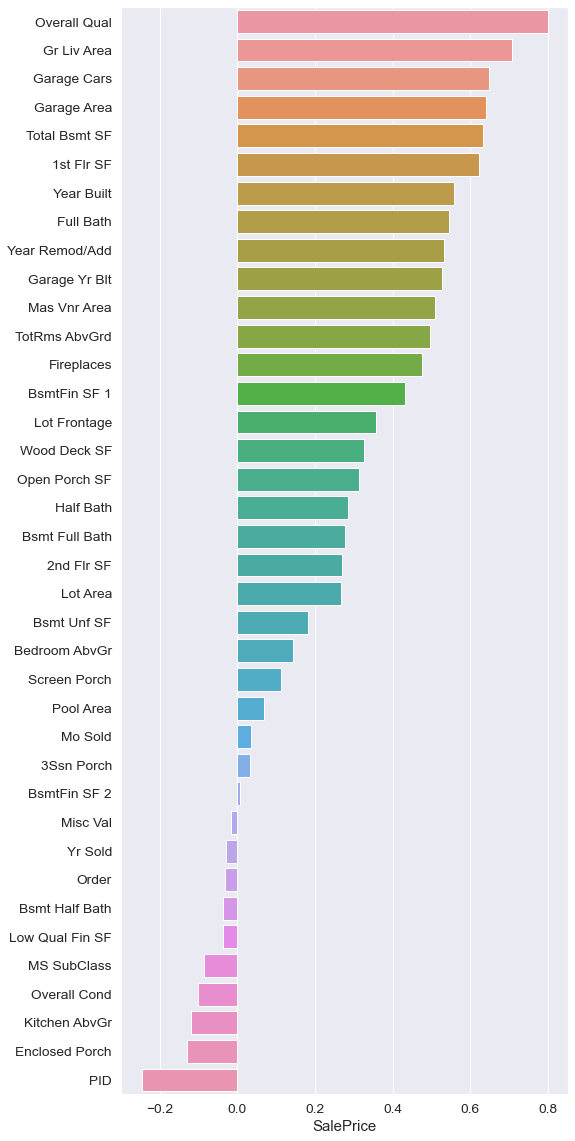

In [142]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = correaltion.sort_values('SalePrice', ascending=False)
corr
plt.figure(figsize=(8,20))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()
corr_num_cols = corr.index[0:10]

We see that OverallQual, GrLivArea, Total Bsmt SF, 1st Flr SF, Year Built are highly correlated with Sales Price which makes sense intuitively too. ALthough we see that Garage Cars and Garage Area are also one of the highly correlated features, which isnt that obvious

In regression we usually want to avoid including predictors highly correlated with one another to minimize multicollinearity

<AxesSubplot:>

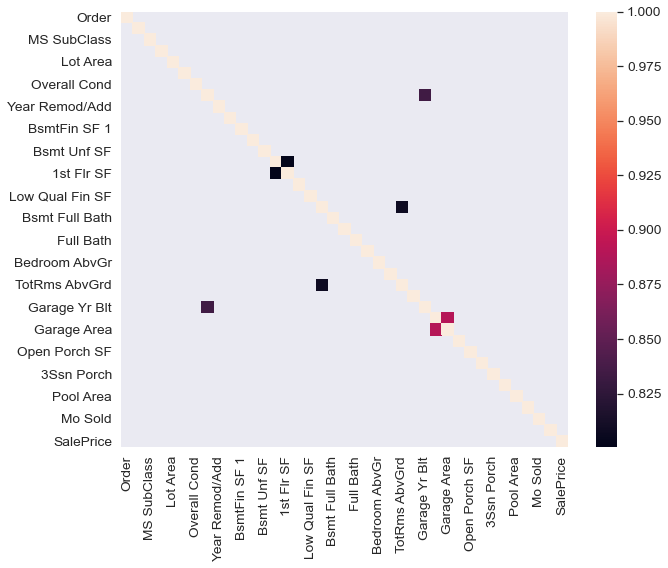

In [92]:
kot = correaltion[correaltion>=.8]
plt.figure(figsize=(10,8))
sns.heatmap(kot)


The above heatmap shows features which are highly correlated with one another (>.8), & can be removed for regression purposes if required 

#### Categorical data

In [116]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

LE = LabelEncoder()

#filter categorical cols into new dataframe
categoricalcols = housingdf.filter(housingdf.dtypes[catcols].index, axis=1)
#drop na columns where all cols = NA
categoricalcols = categoricalcols.dropna(how='all')
# replace NaN with empty string
categoricalcols = categoricalcols.replace(np.nan, '', regex=True)
#apply label encoder
categoricalcols = categoricalcols.apply(LabelEncoder().fit_transform)
#append sale price to new df
categoricalcols['SalePrice'] = housingdf['SalePrice']    
categoricalcols.head(5)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,5,1,0,0,3,0,0,0,15,2,...,1,5,5,1,0,0,0,9,4,215000
1,4,1,0,3,3,0,4,0,15,1,...,3,5,5,2,0,3,0,9,4,105000
2,5,1,0,0,3,0,0,0,15,2,...,3,5,5,2,0,0,2,9,4,172000
3,5,1,0,3,3,0,0,0,15,2,...,1,5,5,2,0,0,0,9,4,244000
4,5,1,0,0,3,0,4,0,8,2,...,1,5,5,2,0,3,0,9,4,189900


In [115]:
correaltion = categoricalcols.corr()
correaltion.style.background_gradient()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
MS Zoning,1.000000,0.121061,-0.235127,0.057889,-0.035519,-0.027307,0.004010,0.014524,-0.252405,-0.017240,0.009805,-0.064184,-0.081271,0.001399,0.005883,-0.035825,-0.037623,0.014636,0.197174,-0.068347,-0.247830,0.154419,-0.011737,0.023390,0.008319,-0.008166,-0.002534,0.155534,0.000913,-0.064004,0.164755,-0.038448,-0.014051,0.099070,0.100396,-0.070315,-0.047192,-0.043519,0.002288,0.101652,0.009974,0.069416,-0.016172
Street,0.121061,1.000000,0.016228,-0.017853,0.093747,-0.190961,0.002211,-0.093787,0.013405,-0.064432,0.000628,0.005283,0.025979,-0.008225,0.007484,0.001354,0.000604,0.000613,0.040739,0.045110,0.012585,-0.007267,0.036133,0.043929,-0.020273,0.028407,0.006606,-0.035347,0.068389,0.021475,-0.032528,0.024108,0.026291,-0.016141,-0.001379,0.033484,0.037656,0.109380,0.003876,0.013827,-0.076010,0.012254,0.016678
Alley,-0.235127,0.016228,1.000000,0.087334,-0.028268,-0.007795,0.069031,-0.025073,0.170998,-0.050576,-0.002479,0.140904,-0.004125,-0.060395,-0.015901,-0.004841,-0.003760,0.084386,0.010446,-0.029600,-0.042085,0.055032,-0.026817,0.126669,0.141265,0.049028,0.041245,-0.039300,-0.104726,-0.064640,-0.008195,0.003168,-0.105557,0.195032,0.073793,-0.070019,-0.072766,-0.156371,-0.015296,-0.030408,-0.005597,-0.044938,-0.041955
Lot Shape,0.057889,-0.017853,0.087334,1.000000,0.091497,-0.016152,0.189884,-0.086293,-0.026575,-0.112227,-0.026188,0.059405,-0.127406,-0.015012,-0.057954,-0.027480,-0.032206,0.061865,0.174899,-0.061593,-0.166572,0.170849,-0.081809,0.123342,0.061466,-0.029533,0.058585,0.119271,-0.124532,-0.128622,0.167603,-0.043594,-0.204654,0.164549,0.166065,-0.148829,-0.132042,-0.157088,0.001219,0.060949,-0.004870,-0.005567,-0.076269
Land Contour,-0.035519,0.093747,-0.028268,0.091497,1.000000,-0.042842,-0.011505,-0.369785,0.049001,0.026278,-0.001549,0.023744,0.067226,-0.030167,-0.030778,0.033040,0.013967,-0.097346,0.021717,0.004490,0.060514,0.017715,0.033133,0.059591,-0.041782,0.009974,-0.001106,-0.036240,0.084426,0.053075,0.034603,0.047240,-0.030121,-0.040089,-0.026312,0.038341,0.018521,0.056338,-0.023885,0.018762,0.003778,-0.025727,0.038204
Utilities,-0.027307,-0.190961,-0.007795,-0.016152,-0.042842,1.000000,-0.008746,-0.006649,-0.006942,-0.015549,-0.000302,-0.013070,-0.000385,0.015227,-0.003595,-0.018233,-0.019042,0.004948,-0.014447,-0.036295,-0.016652,-0.012709,-0.049523,-0.019447,-0.010683,-0.047999,-0.003173,0.036413,-0.041072,-0.108196,0.018053,-0.086286,-0.001738,0.011282,0.024174,0.010203,0.009237,-0.036268,-0.001862,-0.014156,0.061964,-0.058401,-0.016599
Lot Config,0.004010,0.002211,0.069031,0.189884,-0.011505,-0.008746,1.000000,0.011418,-0.051306,0.051599,0.035302,0.104647,-0.023493,-0.008302,-0.042387,0.004024,-0.004797,0.008659,-0.000516,0.054290,-0.013948,0.033976,0.016369,0.020294,0.005877,0.002176,-0.003552,-0.001990,0.009231,0.001032,0.005078,-0.018847,-0.029833,0.005134,0.013548,-0.036527,-0.025386,-0.014956,-0.016219,-0.010652,-0.006025,-0.007495,0.034741
Land Slope,0.014524,-0.093787,-0.025073,-0.086293,-0.369785,-0.006649,0.011418,1.000000,-0.096439,-0.013117,-0.021848,-0.012611,-0.044439,0.020135,0.174081,-0.050916,-0.036023,0.056103,-0.007945,0.000972,-0.010643,-0.011932,0.012107,-0.132710,-0.050064,-0.037907,0.033838,0.012924,-0.019246,-0.007193,-0.014561,-0.083773,0.073556,-0.012227,0.017696,0.011928,0.010689,0.001206,-0.005438,-0.022729,0.015406,0.051767,-0.037608
Neighborhood,-0.252405,0.013405,0.170998,-0.026575,0.049001,-0.006942,-0.051306,-0.096439,1.000000,-0.017432,0.046257,0.018054,0.036837,0.108574,-0.013898,-0

/Users/tanimish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


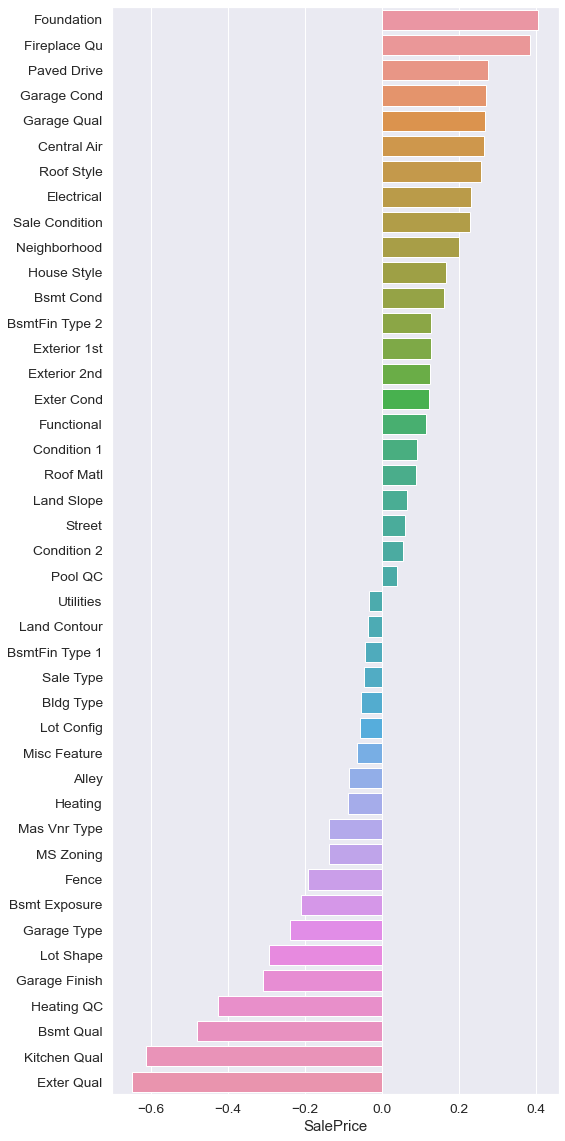

In [140]:
corr_cat = correaltion_cat.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,20))
sns.barplot( corr_cat.SalePrice[1:], corr_cat.index[1:], orient='h')
plt.show()
corr_cat_cols = corr_cat.index[0:10]

It looks like some features show significant variance in the mean of SalePrice between different groups, eg. FOundation, fireplace, Paved Drive, Garage Cond, Garage Qual, Central Air, Roof Type

From above analysis of categorical and numerical features we extract 10 most important features from each set

In [180]:
housingdf_feature1 = housingdf[corr_cat_cols]
housingdf_feature2 = housingdf[corr_num_cols]
housingdf_features = pd.concat([housingdf_feature1,housingdf_feature2], axis=1)
housingdf_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SalePrice       2930 non-null   int64  
 1   Foundation      2930 non-null   object 
 2   Fireplace Qu    1508 non-null   object 
 3   Paved Drive     2930 non-null   object 
 4   Garage Cond     2771 non-null   object 
 5   Garage Qual     2771 non-null   object 
 6   Central Air     2930 non-null   object 
 7   Roof Style      2930 non-null   object 
 8   Electrical      2929 non-null   object 
 9   Sale Condition  2930 non-null   object 
 10  SalePrice       2930 non-null   int64  
 11  Overall Qual    2930 non-null   int64  
 12  Gr Liv Area     2930 non-null   int64  
 13  Garage Cars     2929 non-null   float64
 14  Garage Area     2929 non-null   float64
 15  Total Bsmt SF   2929 non-null   float64
 16  1st Flr SF      2930 non-null   int64  
 17  Year Built      2930 non-null   i

In [167]:
housingdf_features.head()

,SalePrice,Foundation,Fireplace Qu,Paved Drive,Garage Cond,Garage Qual,Central Air,Roof Style,Electrical,Sale Condition,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add
0,215000,CBlock,Gd,P,TA,TA,Y,Hip,SBrkr,Normal,215000,6,1656,2.0,528.0,1080.0,1656,1960,1,1960
1,105000,CBlock,NaN,Y,TA,TA,Y,Gable,SBrkr,Normal,105000,5,896,1.0,730.0,882.0,896,1961,1,1961
2,172000,CBlock,NaN,Y,TA,TA,Y,Hip,SBrkr,Normal,172000,6,1329,1.0,312.0,1329.0,1329,1958,1,1958
3,244000,CBlock,TA,Y,TA,TA,Y,Hip,SBrkr,Normal,244000,7,2110,2.0,522.0,2110.0,2110,1968,2,1968
4,189900,PConc,TA,Y,TA,TA,Y,Gable,SBrkr,Normal,189900,5,1629,2.0,482.0,928.0,928,1997,2,1998


### Data Preprocessing 

In [185]:

#drop na columns where all cols = NA
housingdf_features = housingdf_features.dropna(how='all')
# replace NaN with empty string
housingdf_features = housingdf_features.replace(np.nan, '')
housingdf_features
le = LabelEncoder()

obj_col = housingdf_features.select_dtypes('object').columns
obj_col
#apply label encoder
for cc in obj_col:
    housingdf_features[cc] = le.fit_transform(housingdf_features[cc].astype(str))

In [186]:
housingdf_features.head()

,SalePrice,Foundation,Fireplace Qu,Paved Drive,Garage Cond,Garage Qual,Central Air,Roof Style,Electrical,Sale Condition,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add
0,215000,1,3,1,5,5,1,3,5,4,215000,6,1656,3,300,76,1656,1960,1,1960
1,105000,1,0,2,5,5,1,1,5,4,105000,5,896,2,462,961,896,1961,1,1961
2,172000,1,0,2,5,5,1,3,5,4,172000,6,1329,2,119,278,1329,1958,1,1958
3,244000,1,5,2,5,5,1,3,5,4,244000,7,2110,3,294,650,2110,1968,2,1968
4,189900,2,5,2,5,5,1,1,5,4,189900,5,1629,3,258,996,928,1997,2,1998


We have converted categorical values to numerical, removed missing columns and NaN values.  We will be using this dataset for our further analysis

#### Partition

In [191]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data intro train and validation sets
# X_train, X_test, y_train, y_test = \
#     train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)
# print('Shapes')
# print('X_train:', X_train.shape)
# print('X_val:', X_test.shape)
# print('y_train:', y_train.shape)
# print('y_val:', y_test.shape)